In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from scipy.optimize import curve_fit

In [2]:
df = pd.read_excel("Mexico_GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [3]:
df.describe()

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


array([[<Axes: title={'center': 'Periodo'}>,
        <Axes: title={'center': 'GDP'}>]], dtype=object)

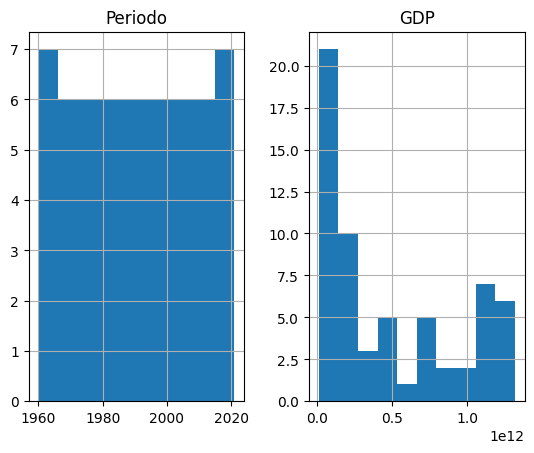

In [4]:
df.hist()

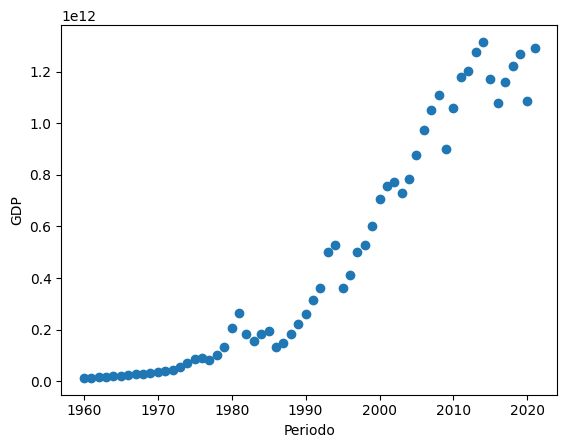

In [5]:
plt.scatter(df.Periodo, df.GDP)
plt.xlabel("Periodo")
plt.ylabel("GDP")
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True])

In [14]:
train = df[msk]
resultado = pd.concat([train.head(5), train.tail(5)])
resultado

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
4,1964,2.008000e+10
5,1965,2.184000e+10
57,2017,1.158913e+12
58,2018,1.222408e+12
59,2019,1.269404e+12
60,2020,1.087118e+12
61,2021,1.293038e+12


In [15]:
test= df[~msk]
test

,Periodo,GDP
3,1963,1.696000e+10
10,1970,3.552000e+10
12,1972,4.520000e+10
18,1978,1.025000e+11
24,1984,1.842615e+11
28,1988,1.816115e+11
29,1989,2.214007e+11
31,1991,3.131428e+11
34,1994,5.278132e+11
45,2005,8.774762e+11


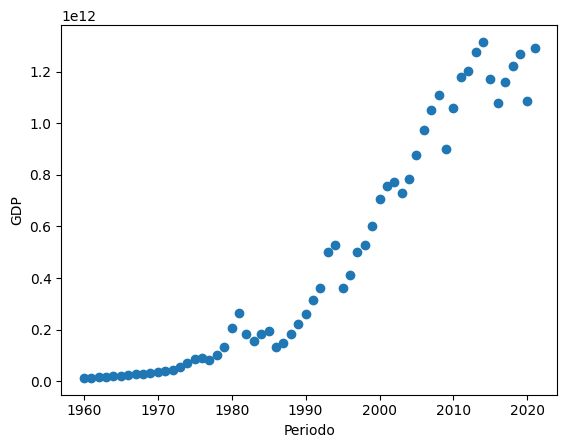

In [16]:
plt.scatter(df.Periodo, df.GDP)
plt.xlabel("Periodo")
plt.ylabel("GDP")
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Periodo']])
train_y = np.asanyarray(train[['GDP']])
regr.fit (train_x, train_y)

LinearRegression()

Text(0, 0.5, 'GDP')

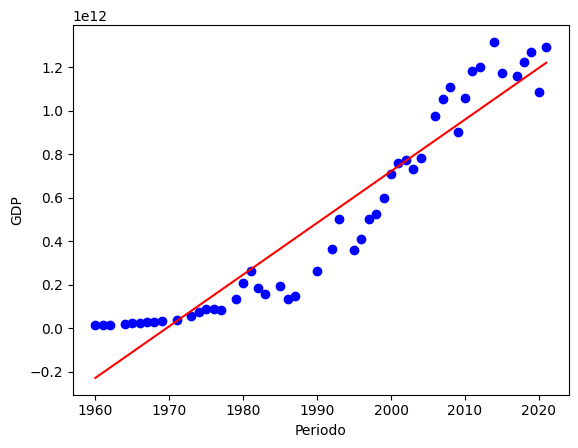

In [18]:
plt.scatter(train.Periodo, train.GDP,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Periodo")
plt.ylabel("GDP")

In [23]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Periodo']])
test_y = np.asanyarray(test[['GDP']])
test_y_hat = regr.predict(test_x)

In [24]:
test_y_hat

array([[-1.57770669e+11],
       [ 8.46617558e+09],
       [ 5.59624168e+10],
       [ 1.98451141e+11],
       [ 3.40939864e+11],
       [ 4.35932347e+11],
       [ 4.59680467e+11],
       [ 5.07176709e+11],
       [ 5.78421071e+11],
       [ 8.39650397e+11],
       [ 1.02963536e+12],
       [ 1.10087972e+12]])